# Group Member Names
(Double-click here and update your group member names below. Remember to keep the `*` symbols for bullet points. Hit  shift+enter when you're done to render the Markdown and make things look pretty again.)
* Rubaiat
* Joe
* Bronlyn
* Alexandra

In [1]:
'''
Your first cell of code. Notice that the pull-down menu says "Code"
when you double-click on this cell. If you double-click the first cell again,
you'll see "Markdown".
In code, stuff that comes between triplets of apostrophes or after a hashtag symbol
is a comment, and is ignored.

This cell needs to be run for the rest of this lab to work.
Be sure to run this cell by hitting shift+enter like you did above for the Markdown cell,
or by clicking the "Run" button above.'''

# These lines load special libraries that help python do sciency things.
# They don't come pre-loaded with "vanilla" python because not everyone uses them, they take
# up space on your drive, and importing them uses up some RAM.
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from netCDF4 import Dataset

# This next line makes it so plots will work in this notebook
%matplotlib inline

# Here we'll define some constants that the rest of the notebook uses.
# (It's nice to declare constants ahead of time. If you just start putting numbers
# in places where you want them, it can keep people from understanding your reasoning.)
speed_of_light = 3e8 # ms^-1
planck_constant = 6.626e-34 # J s
ceres_aperture = 18e-3 # 18 mm entrance pupil diameter (Smith et al., 2002)
ceres_altitude = 705e3 # 705 km nominal altitude for Aqua and Terra satellites

# Problem 1 - Convert frequency to wavelength
Petty problem 2.1 wasn't too bad, but we can do better by automating it.

## Name some frequencies
Run the cell below to create some variables and display them in a table.

In [2]:
band_names = ['WFIU1', 'Ka band police radar', 'red', 'violet', 'UV-c', 'x-ray', 'gamma ray'] 
band_frequencies = np.array([101.9e6, 35e9, 4.5e14, 7.5e14, 1.5e15, 3e17, 3e19]) # in Hz or s^-1
print('-----------------------------------')
print("{:23}| Frequency".format('Description'))
print('-----------------------------------')
for iName, iFreq in zip(band_names,band_frequencies):
    iFreqSci="{:.1e} Hz".format(iFreq)
    iNameLong ="{:23}| ".format(iName)
    print(iNameLong + iFreqSci)
print('-----------------------------------')

-----------------------------------
Description            | Frequency
-----------------------------------
WFIU1                  | 1.0e+08 Hz
Ka band police radar   | 3.5e+10 Hz
red                    | 4.5e+14 Hz
violet                 | 7.5e+14 Hz
UV-c                   | 1.5e+15 Hz
x-ray                  | 3.0e+17 Hz
gamma ray              | 3.0e+19 Hz
-----------------------------------


## Fix the converter
The frequency-to-wavelength converter `freq_to_wave` below is broken. Please fix it and run it so we can use it later if we need. Also, carefully fix the table header.

In [6]:
# Here's the function that should take frequency and phase speed
# and spit out wavelength.
def freq_to_wave(input_frequency, phase_speed):
    output_wavelength = phase_speed/input_frequency
    #output_wavelength = np.arange(len(input_frequency))+1 # replace the right-hand-side with an expression for wavelength
    return(output_wavelength)

# Here we run that function on all of the frequencies we defined in the previous cell.
band_wavelengths = freq_to_wave(band_frequencies, speed_of_light)

# Below we print a table of the frequencies in scientific notation.
# Carefully change the heading over the 2nd column.
print('-----------------------------------')
print("{:23}| Wavelength".format('Description'))
print('-----------------------------------')
for iName, iWave in zip(band_names,band_wavelengths):
    iWaveSci="{:.1e} m".format(iWave)
    iNameLong ="{:23}| ".format(iName)
    print(iNameLong + iWaveSci)
print('-----------------------------------')

-----------------------------------
Description            | Wavelength
-----------------------------------
WFIU1                  | 2.9e+00 m
Ka band police radar   | 8.6e-03 m
red                    | 6.7e-07 m
violet                 | 4.0e-07 m
UV-c                   | 2.0e-07 m
x-ray                  | 1.0e-09 m
gamma ray              | 1.0e-11 m
-----------------------------------


## Plot your results
The cell below makes a scatter plot of wavelength versus frequency. Once you have fixed the frequency-to-wavelength converter above and calculated the correct wavelengths, run this plotter again.

Also, make the change suggested below so that you get a plot that's more useful for dealing with quantities orders of magnitude apart.

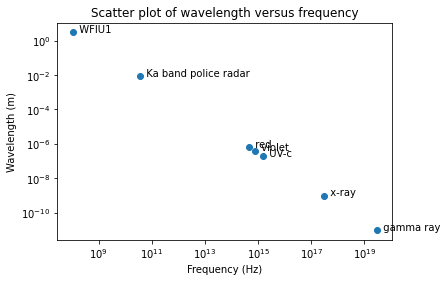

In [7]:
plt.plot(band_frequencies, band_wavelengths, 'o')
for iName, iFreq, iWave in zip(band_names, band_frequencies, band_wavelengths):
    plt.text(iFreq, iWave, "  {}".format(iName))
plt.title("Scatter plot of wavelength versus frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Wavelength (m)")

# Uncomment the lines below to change this to a log-log plot
plt.yscale("log") 
plt.xscale("log")

## Just Checking
You can check your answers against this image below.
![](http://www.sengpielaudio.com/SpectrumOfElectromagneticRadiation.gif)
_(c) Philip Ronan / Wikimedia Commons / CC-BY-SA-3.0_

# Problem 2 - Convert wavelength to frequency
## A little background
Light interacts with objects differently, depending on their size relative to the wavelength of the light. If an object is _much_ larger than the wavelength, geometric objects come into play—the kind of behavior we are familiar with in our macroscale world lit by visible light. If an object is _much_ smaller than the wavelength, it does what we call Rayleigh (pronounced ray-lee) scattering. If an object is similar in size to the wavelength, it does what we call mie (pronounced "me") scattering. The figure below has some nice examples. In it, $x$ is the ratio of object size to wavelength.

![Optical Regimes](http://2016.igem.org/wiki/images/4/46/T--TU_Delft--Scattering_regimes.png)

Using the cell below, print the frequency of light for which each of the object is clearly within its mie scattering regime. _Hint: You don't need the figure above. You just need to calculate the frequency of light corresponding to a wavelength as big as the object._

Run the cell below to define some length scales (in powers of ten).

In [ ]:
obj_names = ['Aerosol Particle', 'Cloud Droplet', 'Rain Drop', 'Military Drone']
obj_magnitudes = np.array([-7, -5, -3, 1])
print('-----------------------------')
print("{:17}| Magnitude".format('Object'))
print('-----------------------------')
for i_name, i_mag in zip(obj_names, obj_magnitudes):
    i_mag_sci="10^({:}) m".format(i_mag)
    i_name_long ="{:17}| ".format(i_name)
    print(i_name_long + i_mag_sci)
print('-----------------------------')

 We'll come back to scattering again soon. For now, just know that scattering regimes are important, and for a given kind of object (and object size), the choice of wavelength for a transmitter or sensor is important.

## Time to fix a function again
Oh no! The wave-to-frequency converter `wave_to_freq` below is broken! (How does this keep happening!?) Please fix it, fix the table header, and run the cell to display a table of frequencies corresponding to a wavelength as wide as the object.

In [ ]:
def wave_to_freq(input_wavelength, phase_speed):
    output_frequency = pjase_speed/input_wavelength # replace the right-hand-side with an expression for frequency
    return(output_frequency)

obj_frequencies = wave_to_freq(10.**obj_magnitudes, speed_of_light)
print('--------------------------------')
print("{:17}| CHANGE ME".format('Object'))
print('--------------------------------')
for iName, iFreq in zip(obj_names,obj_frequencies):
    iFreqSci="{:.1e} Hz".format(iFreq)
    iNameLong ="{:17}| ".format(iName)
    print(iNameLong + iFreqSci)
print('--------------------------------')

# Problem 3 - Calculating doppler shift

## Doppler shifts and radar
Radars use doppler shifting to calculate how quickly rain droplets are moving radially relative to the radar station. Petty #2.2 - the doppler shift for a stationary transmitter and a moving observer - gets you halfway there (from the radar to the raindrop). The other half of the problem (the return trip to the radar) is the doppler shift for a moving transmitter and a stationary observer. The expression is slightly different:
$$f_o=\frac{f_t}{\left ( 1+\frac{\nu}{c} \right)}$$

## An James Webb Space Telescope example
The James Webb Space Telescope operates in the infrared to capture details from the farthest reachest of observable space. Since the universe is expanding, everything is moving apart. Stars farther away are moving faster. The resulting doppler shift makes stars appear redder, and is often called "red shift." Hubble used the red shift of stars to figure out how quickly the universe is expanding, and from there figured out how old the universe is. (No wonder there's a telescope named after him.)

The thing is, objects _very_ far away are moving _very_ quickly — at relativistic speeds compared to us. That's fast enough to red-shift their light right out of the visible and into the infrared. (The highest frequency waves, x-rays and gamma rays, are attenuated as they cross the universe; similar attenuation of relatively short waves occurs in a bunch of settings, as you'll see elsewhere in this course.)

By using infrared light, the James Webb Space Telescope will be able to see light that was given off by stars right after the universe was born. This light has been traveling across the universe for billions of years, and will teach us about the earliest moments of the universe. (And there's lots of amazing questions to be answered with infrared light from objects more nearby, like, say, exoplanets. Sometimes it's just great having a giant telescope out in our solar system.)

In the example below, we'll define some approximate wavelengths of near-infrared light, visible light, and ultraviolet. Then we'll put our doppler-shift expressions into code so we can see how different colors are red-shifted at different speeds.

In [ ]:
color_names = ['near-infrared', 'red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'ultraviolet']
color_plotnames = color_names.copy()
color_plotnames[0] = 'black'
color_plotnames[-1] = 'gray'
color_wavelengths = np.array([900, 710, 600, 550, 510, 450, 410, 390, 200])*1e-9
color_frequencies = wave_to_freq(color_wavelengths, speed_of_light)
star_speeds = np.array([0.1, 1, 2, 2.5, 2.75, 2.875, 2.9, 2.99, 2.997])*1e8

### Moving transmitter, stationary observer
Let's treat the light from distant stars as being emitted by a moving transmitter, and make a contour plot of the color of observed light versus the transmitted frequency and transmitter velocity.

Oh, and the function below is broken. Again. (_Seriously, Dr. Staten!?_)

In [ ]:
def doppler_moving_trns(transmitted_frequency, transmitter_speed):
    observed_frequency = transmitted_frequency*np.ones_like(transmitter_speed) # FIXME
    return(observed_frequency)

observed_frequencies1 = doppler_moving_trns(color_frequencies[np.newaxis,:], star_speeds[:, np.newaxis])
plt.contourf(color_frequencies, star_speeds, observed_frequencies1, levels=color_frequencies, colors=color_plotnames, extend='both')
plt.xscale("log")
plt.title("Observed colors, stars moving")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Transmitter speed ($10^8$ms$^{-1}$)")

## Written Response
Based on the figure above, how fast does the transmitting star need to be moving away from the earth in order for all visible light to be shifted to infrared? Does this make sense? Why or why not? Enter your answer in the cell below (as Markdown).

`Double-click this cell to use for your response`

## Moving observer, stationary transmitter
Since motion in space is relative, anyway, can we just treat the observer as moving instead, and use the equation above? Let's use the moving observer formula from Petty #2.2 and see what happens.

In [ ]:
def doppler_moving_rcvr(transmitted_frequency, receiver_speed):
    observed_frequency = transmitted_frequency * np.ones_like(receiver_speed)
    return(observed_frequency)

observed_frequencies2 = doppler_moving_rcvr(color_frequencies[np.newaxis,:], star_speeds[:, np.newaxis])
plt.contourf(color_frequencies, star_speeds, observed_frequencies2, levels=color_frequencies, colors=color_plotnames, extend='both')
plt.xscale("log")
plt.title("Observed colors, earth")
plt.xlabel("Transmitted Frequency (Hz)")
plt.ylabel("Speed of the moving Earth ($10^8$ms$^{-1}$)")

## Written Response

Based on the figure above, how fast does the earth need to be moving away from the stars in order for all visible light to be shifted to infrared? Does this make sense? Why or why not? Enter your answer in the cell below (as Markdown).

`Double-click this cell to use for your response`

## Maybe _both_ are moving away from each other at similar speeds?
Now that you fixed both of the functions above, I'll assume that, since there's no absolute reference point anyway, we can just treat the transmitter and receiver as moving apart at equal and opposite velocities. Run the cell below to apply the moving transmitter function (at half-speed) to the transmitted frequencies and the moving observer equation (also at half-speed) and see how that does. Nothing for you to change; just run it.

In [ ]:
observed_frequencies3 = doppler_moving_rcvr(doppler_moving_trns(color_frequencies[np.newaxis,:], star_speeds[:,np.newaxis]/2.), star_speeds[:, np.newaxis]/2.)
plt.contourf(color_frequencies, star_speeds, observed_frequencies3, levels=color_frequencies, colors=color_plotnames, extend='both')
plt.xscale("log")
plt.title("Observed colors, both moving")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Summed speed of Stars and Earth ($10^8$ms$^{-1}$)")

## Written Response

Based on the figure above, how fast would the earth and stars need to be moving away each other in order for all visible light to be shifted to infrared? Does this make sense? Why or why not? Enter your answer in the cell below (as Markdown).

`Double-click this cell to use for your response`

# Problem 4 - photons from earth...in space
Photodetectors (i.e. cameras, spectrometers, etc.) often work by accumulating a charge each time photons hit a chip. (In the case of a digital camera, this is called a charged couple device, or CCD, which contains a whole grid of tiny photo-receptors.) Every so often, this charge is recorded and dumped so the process can start over (and a new image or measurement can be taken).

The Clouds and the Earth's Radiant Energy System (CERES) instrument suite has several sensors designed to measure the longwave radiance of the earth from space. Some of these operate over a narrow spectral window. In contrast, the total infrared ("TOT") sensor captures everything between 0.3 $\mu$m to 200 $\mu$m, which is pretty much all that earth emits. 

But CERES has a tiny telescope, it's hundreds of miles away, and it only samples one 10-km-wide scene, or "footprint," at a time. How many photons of outgoing longwave radiation (OLR) actually hit the sensor each second?

To figure this out, we'll first want to pick a representative wavelength for OLR. Using the spectrum in the image below, choose one such wavelength, and enter it into the `representative_wavelength` variable in the cell below. (Note that the x-axis does not show frequency $c/\lambda$ but the wavenumber $1/\lambda$. Engineers and scientists like the wavenumber because it comes in numbers that are easy to put our heads around.)
![Earth's blackbody spectrum](https://www.researchgate.net/profile/KW_Jucks/publication/11002997/figure/fig1/AS:601756643885074@1520481372523/IR-portion-of-the-Earth-model-spectrum-showing-the-blackbody-spectrum-of-the-Earths.png)

In [ ]:
indata = Dataset('Aqua_CERES_47min_subsampled_from_2021-11-02.nc')
ceres_lon = indata.variables['lon'][:]
ceres_lat = indata.variables['lat'][:]
ceres_irr = indata.variables['CERES_LW_TOA_flux___upwards'][:]
ceres_rad = indata.variables['CERES_LW_radiance___upwards'][:]

representative_wavelength = 1 # CHOOSE A GOOD VALUE based on the figure above

Now fix the formula below by using what you learned from Petty #2.9. But be careful! (Should you use $\pi$, $2\pi$, or $4\pi$ in your denominator?)

In [ ]:
ceres_footprint = 10e3*np.pi # m^2
watts_at_earth = ceres_irr * ceres_footprint # watts per meter squared * square meters = watts
watts_at_ceres = watts_at_earth * (np.pi * ceres_aperture) / (2*np.pi*ceres_altitude**2.) # ENTER A GOOD FORMULA HERE
photons_at_ceres = watts_at_ceres * representative_wavelength / planck_constant / speed_of_light
plt.set_cmap('viridis')
median_photons = np.median(photons_at_ceres)
pho_colors = photons_at_ceres / np.percentile(photons_at_ceres, 90)
plt.scatter(ceres_lon, ceres_lat, c=pho_colors, s=3)
plt.title('photons hitting CERES detector (# s$^{-1}$) ')
plt.xlabel('$^\circ$lon')
plt.ylabel('$^\circ$lat')
plt.text(30, -76, "median {:.1e} photons".format(median_photons))

## Written Response

How does the number of electrons compare to what you expected? Is this good or bad? What changes could be made to the instrument, do you think, based on the number of photons observed every second?

`Double-click this cell to use for your response`

# Problem 5 - Radiance vs Irradiance
In Petty #2.16, you proved a certain relationship between the radiance (which Petty calls intensity) of light coming from a surface, and the irradiance (which Petty and climate scientists often just call "flux") coming out of that surface.

Enter the coefficient from this relationship as the `best_guess_factor` below, and run the code to plot the Irradiance, Radiance, and the error of the conversion between the two using the constant factor from your homework.

In [ ]:
best_guess_factor = 1 # use the value here from Petty #2.16
plt.set_cmap('inferno')
irr_colors = ceres_irr/np.percentile(ceres_irr, 90)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
ax[0].scatter(ceres_lon, ceres_lat, c=irr_colors, s=3)
ax[0].set_title('(a) irr (Wm$^{-2}$)')
ax[1].set_xlabel('$^\circ$lon')
ax[0].set_ylabel('$^\circ$lat')

rad_colors = ceres_rad/np.percentile(ceres_irr, 90)*best_guess_factor
ax[1].scatter(ceres_lon, ceres_lat, c=rad_colors, s=3)
ax[1].set_title('(b) rad (Wm$^{-2}$sr$^{-1}$)')

plt.set_cmap('RdBu_r')
dif_colors = rad_colors - irr_colors
ax[2].scatter(ceres_lon, ceres_lat, c=dif_colors, s=3)
ax[2].set_title('(c) error?')
ax[1].set_xlabel('$^\circ$lon')
ax[0].set_ylabel('$^\circ$lat')

## Written Response
How does the accuracy of the irradiance-to-flux conversion from Petty #2.16 compare to what you expected?

Looking at the error plot, what do you think is the primary source of error in the textbook's conversion factor? (What's the faulty assumption?)

What evidence do you have for your claim? Explain.

`Double-click this cell to use for your response`

# References
* G. Louis Smith, Gary L. Peterson, Robert Benjamin Lee III, Bruce R. Barkstrom, "Optical design of the CERES telescope," Proc. SPIE 4483, Earth Observing Systems VI, (18 January 2002); http://doi.org/10.1117/12.453463
* David J. Des Marais, Martin O. Harwit, Kenneth W. Jucks, James F. Kasting, Douglas N.C. Lin, Jonathan I. Lunine, Jean Schneider, Sara Seager, Wesley A. Traub, and Neville J. Woolf.Astrobiology.Jun 2002.153-181.http://doi.org/10.1089/15311070260192246
* V. I. Kostylev, "Scattering Fundamentals," Bistatic Radar Principles Practice, pp. 193–223, 2007.

# Acknowledgements
* Data downloaded from https://ceres-tool.larc.nasa.gov/ord-tool/
* Binder service by https://MyBinder.org